# A*(star) search algorithm

**Student name**: Lais Carvalho | **student ID**: 2019435 | **email**: santanal@tcd.ie

## Notebook's Overview

This notebook constains the explanation and implementation of the **A star search algorithm**, submitted as home assignment I worth 5% of the final grade for Year 4 of the module Artifical Intelligence on the couse of Computing and Multimedia at CCT College Dublin.

## Explanation

The A* (pronounced __'*a star*'__) search algorithm is very similar to Djikstra's one for finding the shortest path from an origin to a certain goal. The difference is that _A*_ will also use heuristics to perform an informed search on the tree/graph/map. Hence, making an informed choice on which node to follow next, finding the optimal path to the goal and avoiding searching on nodes which will lead to further away from the objective of the search.  
In summary, *A star* uses the accumulated distance to the goal node PLUS admissable heristics (relative distance).

## Exemplification

Suppose we have a map/tree/graph (not necessarily loyal to real-world graphical representation) of a series of nodes, like the one in the figure below (used on the code):


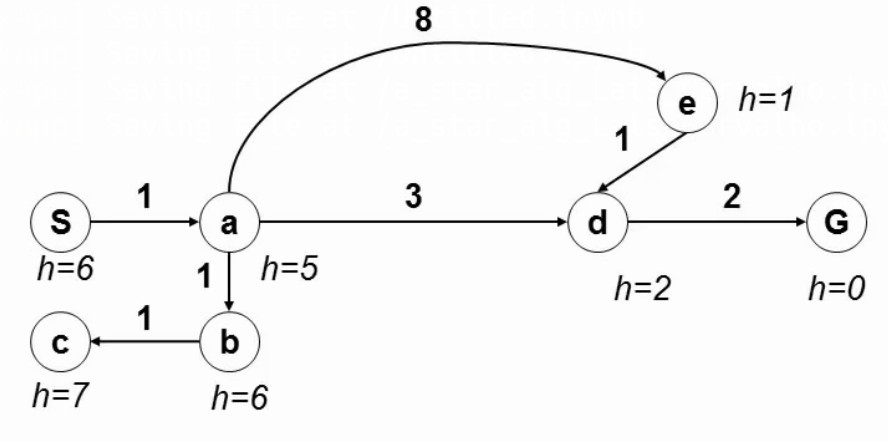

Where:
* "Uniform Cost" -> Distance from each node is represented by the integers 1, 8, 3 and 2;
* "Greedy" -> Heuristic distance, represented by `h`.


To perform an informed search, each node in the tree (graph or map) will have a _weight_ assigned (heuristic) to it that will make possible to quickly compute the cost to get to the goal node.
> NOTE: In order for the *A star* search to return the shortest/optimal path, heuristic distances can never overestimate the real cost (Manhattan distance) to the goal. It must either underestimate it or to match it.


Starting from the start node `S`, we log the heuristic distance of the node to the dictionary of visited nodes. And proceed to expand the search. For each visited node (when all possibilities are evaluated) the shorthest A* score is chosen and added to the dictionary of visited nodes.
When all nodes expanded have the same *A* cost*, the algorithm performs the expansion/evaluation on the next node following the alphabetical order. Finally, the heuristic measure for goal states are always ZERO.

A* score = cost of the path (so far) + heuristic of the end node of the path
which gives an estimate of the total cost of the path so far.

The [Berkley video](https://youtu.be/b9fH-j_yNHU?t=158) specifies the formualaes as such:

`F(n) = G(n) + H(n)`, where:
* `F(n)` = A* score;
* `G(n)` = Uniform Cost order (a.k.a. *backward cost*) i.e., edge distance from start node to end node;
* `H(n)` = Greedy order (a.k.a. *forward cost*) i.e., heuristic distance between current node and end node).


## Implementation

For the implemetation, the student used the code available on [this GitHub repository](https://github.com/marcoscastro/a_star_search_algorithm) and slightly adapt it for better understanding.
The following snippets are compatible with Python 2.7 and 3.9.  

The code and comments are as follows:

In [1]:
import heapq  # PriorityQueue
from collections import defaultdict


# class that represents a priority queue
class PriorityQueue:
    def __init__(self):
        self._queue = []
        self._index = 0

    def insert(self, item, priority):
        # inserts node items into the priority queue
        heapq.heappush(self._queue, (priority, self._index, item))
        self._index += 1

    def remove(self):
        # removes node items into the priority queue
        return heapq.heappop(self._queue)[-1]

    def isEmpty(self):
        # checks if the priority queue is empty
        return len(self._queue) == 0

    def getSize(self):
        # returns the size of the priority queue
        return self._index


# class that represents a node
class Node:

    # "key" is the identifier of node
    # "forward_cost" is h(n) (cost of the heuristic)
    # "forward_cost" is used in the calculate of "A* search": f(n) = g(n) + h(n) where
    # h(n) is the forward cost and g(n) is the backward cost
    # remember: "A* search" is the combination of Uniform-cost (UCS) and Greedy
    def __init__(self, key, forward_cost):
        self.key = key
        self.forward_cost = forward_cost

    def getKey(self):
        # returns the key of the dictionary for a node
        return self.key

    def getForwardCost(self):
        # returns the forward cost ()
        return self.forward_cost


# class that represents a graph/map
class Graph:
    def __init__(self):
        self.nodes = {}  # dictionary of the nodes
        self.edges = []  # list of 3-tuple (source, destination, weight)
        self.path = []  # path

        # dictionary with the lists of successors of each node, faster for get the successors
        # each item of list is a 2-tuple: (destination, weight)
        self.successors = defaultdict(list)

    def addEdge(self, source, destination, weight):
        edge = (source, destination, weight)  # creates tuple (3-tuple)
        if not self.existsEdge(edge):  # adds edge if not exists
            self.nodes[source], self.nodes[destination] = (
                source,
                destination,
            )  # adds the nodes
            self.edges.append(edge)  # adds edge
            self.successors[source.getKey()].append(
                (destination, weight)
            )  # adds successor
        else:
            print(
                "Error: edge (%s -> %s with weight %s) already exists!!"
                % (edge[0].getKey(), edge[1].getKey(), edge[2])
            )

    def existsEdge(self, edge):
        # Checks the existance of edges between nodes
        for e in self.edges:
            # compares source's key, destionation's key and weight of edge
            if (
                e[0].getKey() == edge[0].getKey()
                and e[1].getKey() == edge[1].getKey()
                and e[2] == edge[2]
            ):
                return True
        return False

    def getPath(self):
        # Returns the path found
        return self.path

    def executeAStar(self, initial_node, goal_node):
        # Runs the "A*" search (meat of the program)
        if not self.edges:
            print("Error: graph not contains edges!!")
        else:
            # checks if both the nodes exists
            if initial_node in self.nodes and goal_node in self.nodes:
                if initial_node == goal_node:  # checks if are the same nodes
                    return 0

                queue = PriorityQueue()  # creates a priority queue (min heap)

                # "distance_vector" and "antecessors" are used for reconstruct the path
                distance_vector, antecessors = {}, {}
                for node in self.nodes:
                    distance_vector[node.getKey()] = None  # initializes with None
                    antecessors[node.getKey()] = None
                distance_vector[initial_node.getKey()] = 0

                # calculates costs
                g_cost, h_cost = 0, initial_node.getForwardCost()
                f_cost = g_cost + h_cost
                queue.insert((initial_node, g_cost, h_cost), f_cost)
                total_cost = None

                while True:

                    # a item of the queue is a 3-tuple: (current_node, g_cost, h_cost)
                    current_node, g_cost, h_cost = queue.remove()

                    # gets all the successors of "current_node"
                    successors = self.successors[current_node.getKey()]

                    for successor in successors:
                        destination, weight = successor  # unpack 2-tuple successor

                        # calculates costs
                        new_g_cost = g_cost + weight
                        h_cost = destination.getForwardCost()
                        f_cost = new_g_cost + h_cost
                        queue.insert((destination, new_g_cost, h_cost), f_cost)

                        # updates "distance_vector"
                        if distance_vector[destination.getKey()]:
                            if distance_vector[destination.getKey()] > new_g_cost:
                                distance_vector[destination.getKey()] = new_g_cost
                                antecessors[
                                    destination.getKey()
                                ] = current_node.getKey()
                        else:
                            distance_vector[destination.getKey()] = new_g_cost
                            antecessors[destination.getKey()] = current_node.getKey()

                        # verifies that reached the goal
                        if destination.getKey() == goal_node.getKey():
                            # updated "total_cost"
                            if not total_cost:
                                total_cost = f_cost
                            elif f_cost < total_cost:
                                total_cost = f_cost

                    if queue.isEmpty():  # verifies if the queue is empty
                        # reconstructs the path
                        curr_node = goal_node.getKey()
                        while curr_node:
                            self.path.append(curr_node)
                            curr_node = antecessors[curr_node]
                        self.path = self.path[::-1]
                        return total_cost
            else:
                print("Error: the node(s) not exists in the graph!!")

Representing the image as a Graph (map) and executing the metods above:

In [2]:
# Map the graph as nodes
nodeS = Node('S', 6)
nodeA = Node('A', 5)
nodeB = Node('B', 6)
nodeC = Node('C', 7)
nodeE = Node('E', 1)
nodeD = Node('D', 2)
nodeG = Node('G', 0)

# Call the functions on the graphed methods
graph = Graph()
graph.addEdge(nodeS, nodeA, 1)
graph.addEdge(nodeA, nodeB, 1)
graph.addEdge(nodeB, nodeC, 1)
graph.addEdge(nodeA, nodeE, 8)
graph.addEdge(nodeA, nodeD, 3)
graph.addEdge(nodeE, nodeD, 2)
graph.addEdge(nodeD, nodeG, 2)

# Determine total cost and path
total_cost = graph.executeAStar(nodeS, nodeG)
path = graph.getPath()

# Return values
if total_cost:
    print(f'Total cost of graph 2: %s. Path: %s' %(total_cost, path))
else:
    print('Did not reach the goal!')

Total cost of graph 2: 6. Path: ['S', 'A', 'D', 'G']


### References

For the written _report_ the following resources were used:
* Berkley AI - [A* Tree Search Algorithm YouTube lecture](https://www.youtube.com/watch?v=b9fH-j_yNHU)
* John Levine's - [A* Search YouTube video](https://youtu.be/6TsL96NAZCo)
* Patrick H. Winston (MITOpenCourseWare) [Lecture 5. Search: Optimal, Branch and Bound, A*](https://youtu.be/gGQ-vAmdAOI)